# Benchmark results

This notebook contains the results from the benchmarking comparison. The results were obtained from a Acer Aspire 5 15 running on a Fedora 42 OS.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
sns.set_theme(style="whitegrid")

In [11]:
root = Path("results")
pattern = re.compile(r"results_(?P<lang>py|java|c)_(?P<size>\d+)\.csv")
rows = []
for p in sorted(root.glob("results_*.csv")):
    m = pattern.match(p.name)
    if not m:
        continue
    code = m.group('lang')
    size = int(m.group('size'))
    names = {'py':'Python','java':'Java','c':'C'}
    lang = names.get(code, code)
    df = pd.read_csv(p)
    time_col = None
    cpu_col = None
    mem_col = None
    for col in df.columns:
        cl = col.lower()
        if time_col is None and 'time' in cl:
            time_col = col
        if cpu_col is None and 'cpu' in cl:
            cpu_col = col
        if mem_col is None and ('mem' in cl or 'memory' in cl):
            mem_col = col
    mean_time = df[time_col].mean() if time_col is not None else None
    mean_cpu = df[cpu_col].mean() if cpu_col is not None else None
    mean_mem = df[mem_col].mean() if mem_col is not None else None
    rows.append({'language': lang, 'size': size, 'mean_time': mean_time, 'mean_cpu': mean_cpu, 'mean_mem': mean_mem, 'file': str(p)})
agg = pd.DataFrame(rows)
agg = agg.sort_values(['size','language']).reset_index(drop=True)
agg

,language,size,mean_time,mean_cpu,mean_mem,file
0,C,10,0.000002,0.00017,0.000,results\results_c_10.csv
1,Java,10,0.000804,1.00000,0.089,results\results_java_10.csv
2,Python,10,0.000102,5.00000,0.000,results\results_py_10.csv
3,C,50,0.000108,0.01074,0.000,results\results_c_50.csv
4,Java,50,0.000923,11.50000,0.022,results\results_java_50.csv
5,Python,50,0.011126,12.93500,0.007,results\results_py_50.csv
6,C,100,0.001332,0.13233,0.000,results\results_c_100.csv
7,Java,100,0.002766,27.77800,0.046,results\results_java_100.csv
8,Python,100,0.088605,14.97000,0.031,results\results_py_100.csv
9,C,256,0.021497,2.14209,0.000,results\results_c_256.csv


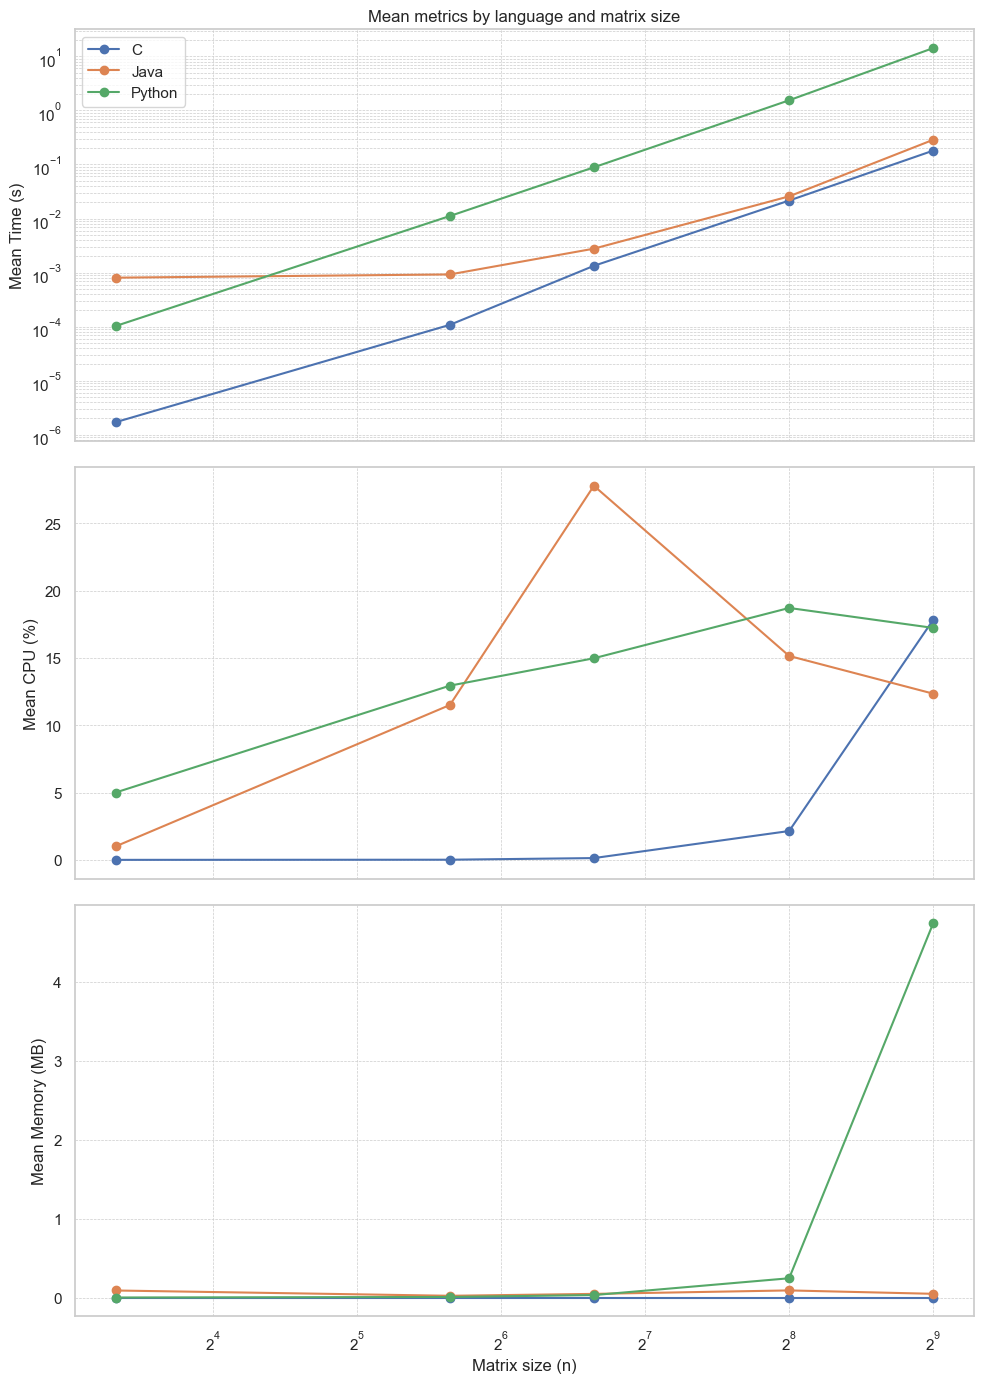

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10,14), sharex=True)
for lang, g in agg.groupby('language'):
    axes[0].plot(g['size'], g['mean_time'], marker='o', label=lang)
axes[0].set_ylabel('Mean Time (s)')
axes[0].set_xscale('log', base=2)
axes[0].set_yscale('log')
axes[0].set_title('Mean metrics by language and matrix size')
axes[0].legend()
axes[0].grid(True, which='both', ls='--', linewidth=0.5)
for lang, g in agg.groupby('language'):
    axes[1].plot(g['size'], g['mean_cpu'], marker='o', label=lang)
axes[1].set_ylabel('Mean CPU (%)')
axes[1].set_xscale('log', base=2)
axes[1].grid(True, ls='--', linewidth=0.5)
for lang, g in agg.groupby('language'):
    axes[2].plot(g['size'], g['mean_mem'], marker='o', label=lang)
axes[2].set_ylabel('Mean Memory (MB)')
axes[2].set_xlabel('Matrix size (n)')
axes[2].set_xscale('log', base=2)
axes[2].grid(True, ls='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [14]:
pivot = agg.pivot_table(index='size', columns='language', values=['mean_time','mean_cpu','mean_mem'])
pivot

mean_cpu                 mean_mem               mean_time            \
language         C    Java  Python        C   Java Python         C      Java   
size                                                                            
10         0.00017   1.000   5.000      0.0  0.089  0.000  0.000002  0.000804   
50         0.01074  11.500  12.935      0.0  0.022  0.007  0.000108  0.000923   
100        0.13233  27.778  14.970      0.0  0.046  0.031  0.001332  0.002766   
256        2.14209  15.142  18.705      0.0  0.090  0.244  0.021497  0.025719   
512       17.82012  12.343  17.225      0.0  0.047  4.740  0.180225  0.285948   

                     
language     Python  
size                 
10         0.000102  
50         0.011126  
100        0.088605  
256        1.542429  
512       14.234368